Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data

data = pd.read_csv('penguins.csv')

In [3]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# Exploratory Data Analysis (EDA)

In [4]:
# Descriptive analysis of body mass

data['body_mass_g'].describe()

,body_mass_g
count,342.000000
mean,4201.754386
std,801.954536
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4750.000000
max,6300.000000


Insight: Rata-rata berat badan penguin adalah 4201.75 gram, dengan range dari 2700 sampai 6300 gram.

In [5]:
# calculate the average and median body mass by gender

filtered = data[data["sex"].isin(["FEMALE", "MALE"])]

body_mass_stats = filtered.groupby("sex")["body_mass_g"].agg(["mean", "median"]).reset_index()

body_mass_stats.columns = ["Sex", "Average Body Mass (g)", "Median Body Mass (g)"]

body_mass_stats["Average Body Mass (g)"] = body_mass_stats["Average Body Mass (g)"].round(2)
body_mass_stats["Median Body Mass (g)"] = body_mass_stats["Median Body Mass (g)"].round(2)

print("Body Mass Statistics by Gender:\n", body_mass_stats)

Body Mass Statistics by Gender:
       Sex  Average Body Mass (g)  Median Body Mass (g)
0  FEMALE                3862.27                3650.0
1    MALE                4543.93                4300.0


Insight:
Penguin berjenis kelamin betina lebih ringan dibandingkan jantan. Penguin betina memiliki rata-rata berat yaitu 3862.27 gram dengan median 3650 gram, sedangkan penguin jantan memiliki rata-rata berat yaitu 4543.93 gram dengan median 4300 gram.

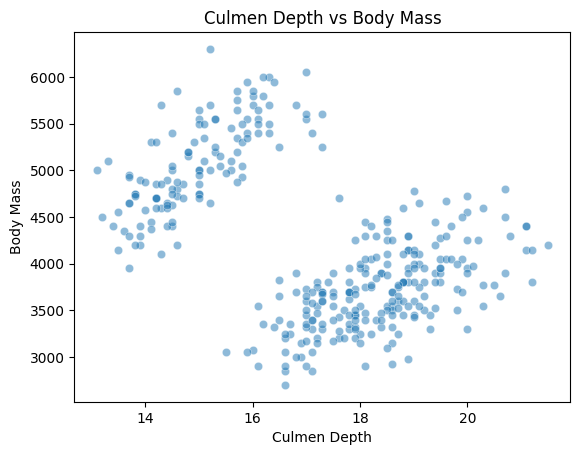

In [6]:
# Scatterplot to see is there any correlation between culmen depth and body mass

sns.scatterplot(x=data["culmen_depth_mm"], y=data["body_mass_g"], alpha=0.5)
plt.title("Culmen Depth vs Body Mass")
plt.xlabel("Culmen Depth")
plt.ylabel("Body Mass")
plt.show()

Insight:
Berdasarkan scatterplot, terdapat korelasi/hubungan yang cukup positif antara culmen depth (kedalaman paruh) dan body mass (berat badan). Insight yang cukup menarik saya dapat di sini yaitu mungkin ada beberapa jenis penguin yang berbeda. Ada yang badannya lebih berat tetapi paruhnya lebih tipis dan ada yang badannya lebih ringan tetapi paruhnya lebih tebal.


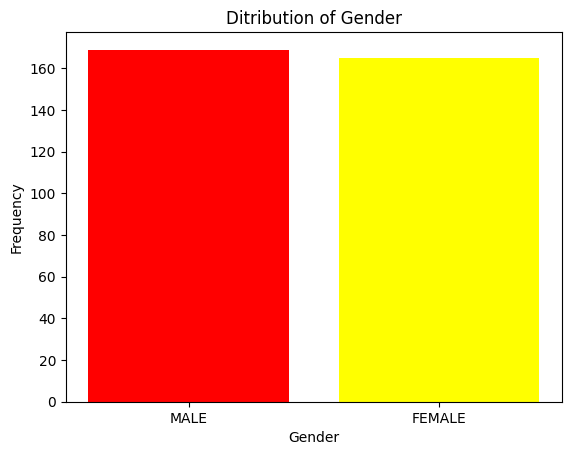

In [7]:
# Show the distribution of gender

filtered = data[data['sex'].isin(['MALE', 'FEMALE'])]

gender_counts = filtered['sex'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['red', 'yellow'])
plt.title("Ditribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Insight: Distribusi jenis kelamin penguin dalam dataset ini cukup balance.

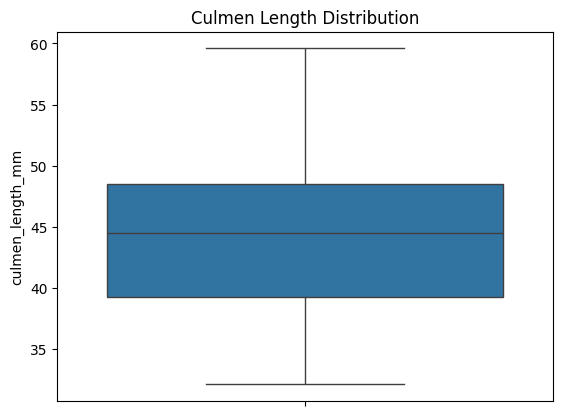

In [8]:
# Boxplot of culmen length

sns.boxplot(data['culmen_length_mm'])
plt.title("Culmen Length Distribution")
plt.show()

Insight:

Sebagian besar penguin dalam dataset memiliki panjang paruh sekitar 39-49 mm. Tidak ada outlier pada variabel ini.

# Data Preprocessing

In [9]:
# check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [10]:
# check sum of missing values for each column in data

data.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


ada beberapa data yang punya missing value di tiap column

In [11]:
# check if there is duplicate values in data

data.duplicated().sum()

np.int64(1)

ada 1 data duplikat

In [12]:
# drop duplicates

data.drop_duplicates(inplace=True)

In [13]:
# check again

data.duplicated().sum()

np.int64(0)

In [14]:
# describe data

data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


ada data panjang flipper (sirip) yang negatif, padahal secara logika tidak mungkin ada yang negatif. ada data outlier juga pada flipper length.

Data Cleaning

In [15]:
# Filter out data where flipper_length_mm is negative or equal to 5000
data = data[(data['flipper_length_mm'] >= 0) & (data['flipper_length_mm'] != 5000)]

In [16]:
data['flipper_length_mm'].describe() # outliers in flipper length already handled

,flipper_length_mm
count,340.000000
mean,200.955882
std,14.089719
min,172.000000
25%,190.000000
50%,197.000000
75%,213.250000
max,231.000000


In [17]:
# filling missing values in columns using mean and mode

data = data.copy()

data['culmen_length_mm'] = data['culmen_length_mm'].fillna(value=data['culmen_length_mm'].mean())
data['culmen_depth_mm'] = data['culmen_depth_mm'].fillna(value=data['culmen_depth_mm'].mean())
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(value=data['flipper_length_mm'].mean())
data['body_mass_g'] = data['body_mass_g'].fillna(value=data['body_mass_g'].mean())
data['sex'] = data['sex'].fillna(value=data['sex'].mode()[0])

In [18]:
# replace '.' with mode in 'sex' column

mode = data['sex'].mode()[0]

data['sex'] = data['sex'].replace('.', mode)

In [19]:
# encode 'sex' using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

In [20]:
data.isna().sum() # no missing values

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [21]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [22]:
# standardize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

# Models

## K-Means Clustering

In [23]:
!pip install kneed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [24]:
inertia = []
n_k = range(1, 11)

# find best k using elbow method
for k in n_k:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)

locator = KneeLocator(n_k, inertia, curve='convex', direction='decreasing')
print('Best cluster for KMeans:', locator.elbow)

Best cluster for KMeans: 4


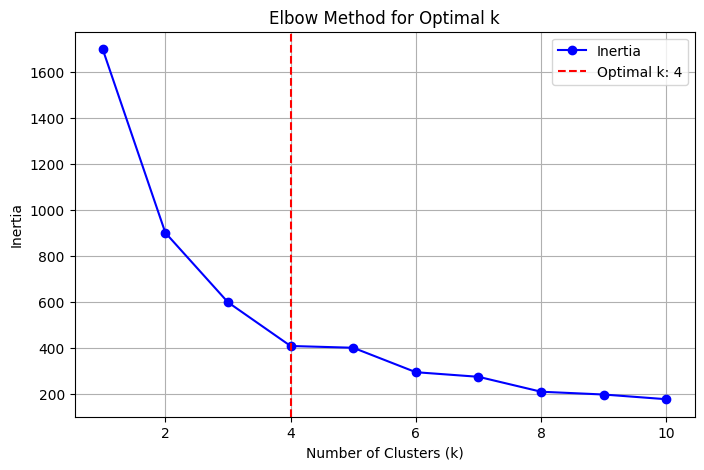

In [25]:
# plotting elbow
plt.figure(figsize=(8, 5))
plt.plot(n_k, inertia, 'bo-', label='Inertia')
plt.axvline(x=locator.elbow, color='r', linestyle='--', label=f'Optimal k: {locator.elbow}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# best model

best_k = locator.elbow

model = KMeans(n_clusters=best_k, random_state=42)
model.fit(data)
labels = model.labels_

best_silhouette = silhouette_score(data, labels)
print(f"Silhouette score for best k = {best_k}: {best_silhouette}")

Silhouette score for best k = 4: 0.496082566336773


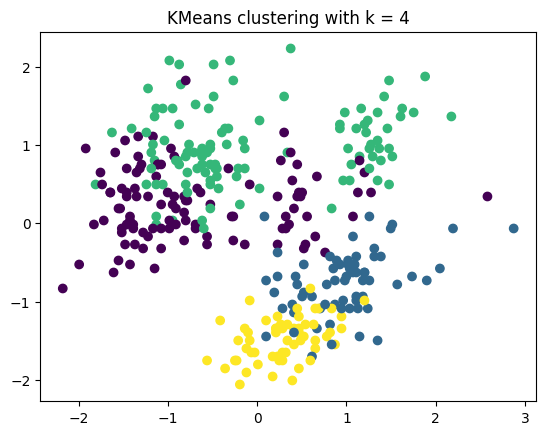

In [27]:
# visualize

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title(f"KMeans clustering with k = {best_k}")
plt.show()

Hasil dari KMeans Clustering membagi data ke dalam 4 cluster. Cluster-cluster tersebut terlihat saling tumpang tindih satu sama lain. Juga jika diperhatikan lebih detail, data-data point (misalnya seperti pada cluster hijau) tidak terkonsentrasi di suatu area, malahan seperti terpecah menjadi 2 area. Jadi dapat disimpulkan bahwa hasil dari KMeans Clustering menurut saya kurang akurat.

## Agglomerative Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

silhouette = []
n_k = range(2, 11)

# find best model by silhouette score
for k in n_k:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(data)

    score = silhouette_score(data, labels)
    silhouette.append(score)

best_k = n_k[silhouette.index(max(silhouette))]
print("Best cluster for Agglomerative Clustering:", best_k)

Best cluster for Agglomerative Clustering: 6


In [29]:
# best model

model = AgglomerativeClustering(n_clusters=best_k)
labels = model.fit_predict(data)

best_silhouette = silhouette_score(data, labels)
print(f"Silhouette score for best k = {best_k}: {best_silhouette}")

Silhouette score for best k = 6: 0.5140715373597697


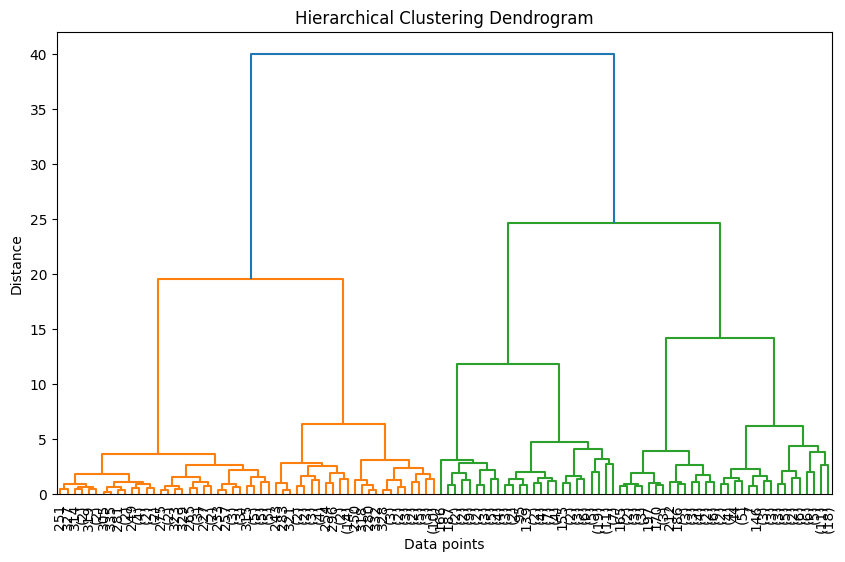

In [30]:
# plot dendogram

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           truncate_mode='level',
           p=best_k,
           leaf_rotation=90.,
           leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

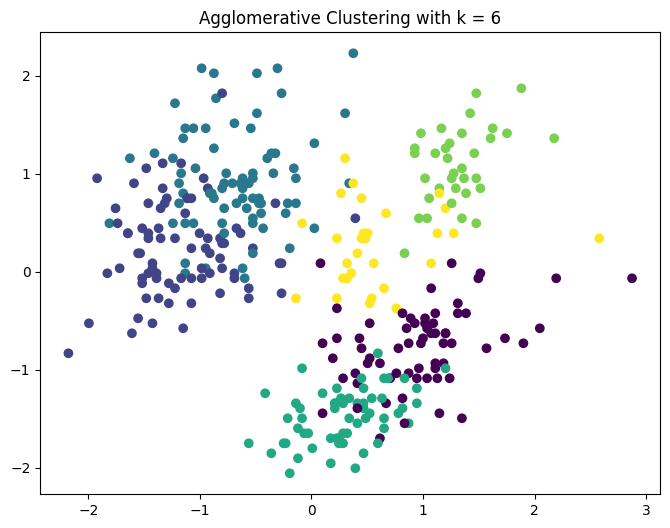

In [31]:
# visualize

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title(f"Agglomerative Clustering with k = {best_k}")
plt.show()

Hasil dari Agglomerative Clustering membagi data ke dalam 6 cluster. Cluster-cluster tersebut terlihat cukup rapi dan terkonsentrasi di suatu area. Meskipun masih ada beberapa cluster yang masih tumpang tindih. Jadi dapat disimpulkan bahwa hasil dari Agglomerative Clustering menurut saya cukup akurat.

## DBSCAN

eps=0.10, min_samples=2 => not enough clusters
eps=0.10, min_samples=3 => not enough clusters
eps=0.10, min_samples=4 => not enough clusters
eps=0.10, min_samples=5 => not enough clusters
eps=0.10, min_samples=6 => not enough clusters
eps=0.10, min_samples=7 => not enough clusters
eps=0.10, min_samples=8 => not enough clusters
eps=0.10, min_samples=9 => not enough clusters
eps=0.10, min_samples=10 => not enough clusters
eps=0.20, min_samples=2 => silhouette score = -0.5644
eps=0.20, min_samples=3 => silhouette score = -0.0268
eps=0.20, min_samples=4 => not enough clusters
eps=0.20, min_samples=5 => not enough clusters
eps=0.20, min_samples=6 => not enough clusters
eps=0.20, min_samples=7 => not enough clusters
eps=0.20, min_samples=8 => not enough clusters
eps=0.20, min_samples=9 => not enough clusters
eps=0.20, min_samples=10 => not enough clusters
eps=0.30, min_samples=2 => silhouette score = -0.2667
eps=0.30, min_samples=3 => silhouette score = -0.3951
eps=0.30, min_samples=4 => sil

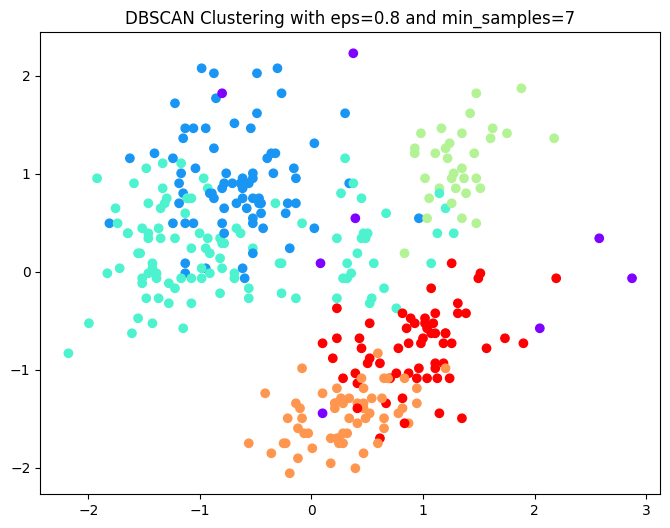

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np

best_score = -1
best_params = None
best_dbscan_labels = None

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_values = range(2, 11)

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)

        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples} => silhouette score = {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_dbscan_labels = labels
        else:
            print(f"eps={eps:.2f}, min_samples={min_samples} => not enough clusters")

# get best params and silhouette score
print("\nBest Parameters:")
print(f"eps = {best_params[0]:.2f}")
print(f"min_samples = {best_params[1]}")
print(f"Best Silhouette Score = {best_score:.4f}")

# visualize the best
if best_dbscan_labels is not None:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=best_dbscan_labels, cmap='rainbow')
    plt.title(f'DBSCAN Clustering with eps={best_params[0]} and min_samples={best_params[1]}')
    plt.show()

Hasil dari DBSCAN membagi data ke dalam 7 cluster. Cluster-cluster tersebut terlihat lumayan rapi dan terkonsentrasi di suatu area. Tetapi pada cluster ungu terlihat tidak terkonsentrasi, di mana data-data point yang ada pada cluster ungu ini terlihat seperti menyebar secara random. Jadi dapat disimpulkan bahwa hasil dari DBSCAN menurut saya kalah akurat dibandingkan dengan Agglomerative Clustering.